# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [1]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Explorando nuestro set de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/StudentsPerformance.csv')

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

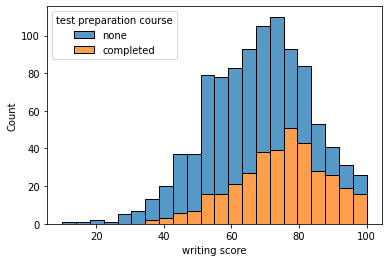

In [ ]:
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

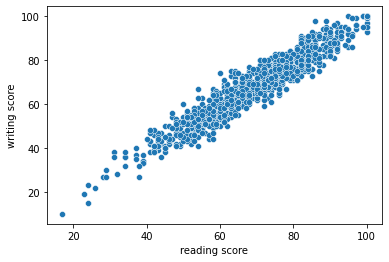

In [ ]:
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

In [ ]:
freq = df['writing score'].value_counts()
freq

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64

In [ ]:
df_freq = freq.to_frame()
df_freq

,writing score
74,35
70,33
68,31
73,28
62,27
...,...
23,1
22,1
19,1
15,1


In [ ]:
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={'index' : 'writing score', 'writing score' : 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X = df['reading score'].values
Y = df['writing score'].values

X = X.reshape(-1, 1)


# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
len(X_train)


800

In [ ]:
X = df['reading score'].values
X

array([ 72,  90,  95,  57,  78,  83,  95,  43,  64,  60,  54,  52,  81,
        72,  53,  75,  89,  32,  42,  58,  69,  75,  54,  73,  71,  74,
        54,  69,  70,  70,  74,  65,  72,  42,  87,  81,  81,  64,  90,
        56,  61,  73,  58,  65,  56,  54,  65,  71,  74,  84,  55,  69,
        44,  78,  84,  41,  85,  55,  59,  17,  74,  39,  61,  80,  58,
        64,  37,  72,  58,  64,  63,  55,  51,  57,  49,  41,  26,  78,
        74,  68,  49,  45,  47,  64,  39,  80,  83,  71,  70,  86,  72,
        34,  79,  45,  86,  81,  66,  72,  67,  67,  67,  74,  91,  44,
        86,  67, 100,  63,  76,  64,  89,  55,  53,  58, 100,  77,  85,
        82,  63,  69,  92,  89,  93,  57,  80,  95,  68,  77,  82,  49,
        84,  37,  74,  81,  79,  55,  54,  55,  66,  61,  72,  62,  55,
        43,  73,  39,  84,  68,  75, 100,  67,  67,  70,  49,  67,  89,
        74,  60,  86,  62,  78,  88,  53,  53,  92, 100,  51,  76,  83,
        75,  73,  88,  86,  67,  51,  91,  54,  77,  70, 100,  6

In [ ]:
X.reshape?

## Visualización de nuestro modelo entrenado

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, Y_train)

print('La pendiente es: ', reg.coef_)
print('El bias es: ', reg.intercept_)
print(reg.score(X_train, Y_train))

La pendiente es:  [0.99342607]
El bias es:  -0.6649013147710576
0.9080751793061478


## Evaluación de nuestro modelo

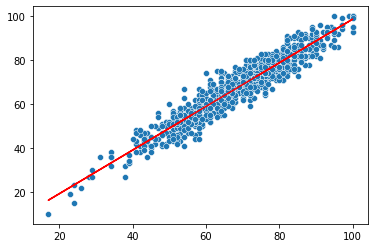

In [ ]:
x_flat = X_train.flatten()
y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train, y_hat, color='r')

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

# Calcular MSE
print( mean_squared_error(Y_test, y_pred) )

19.50550055171068


In [ ]:
value = pd.DataFrame({ 'Actual Test: ': Y_test.flatten(), ' Predict: ' : y_pred.flatten() })

value

,Actual Test:,Predict:
0,91,94.704001
1,65,56.953811
2,76,79.802610
3,49,47.019550
4,49,53.973533
...,...,...
195,49,50.993254
196,75,78.809184
197,90,86.756593
198,91,90.730297


## Data Visualization
**Some graphs for the course**

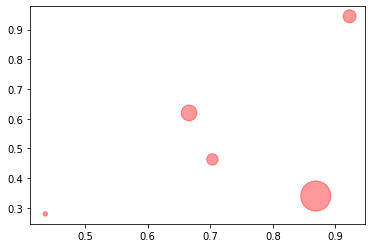

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.rand(5)
y = np.random.rand(5)
z = np.random.rand(5)
 
# Change color with c and alpha
plt.scatter(x, y, s=z*1000, c="red", alpha=0.4)

# show the graph
plt.show()